# **Preprocess ve kümeleme**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

Mounted at /content/drive


In [2]:
df = pd.read_excel("/content/drive/MyDrive/ColabNotebooks/IZVA-Proje/Data/RawData.xlsx")
df.drop(labels = ['Unnamed: 0',"keyPassPerGame_y"],inplace=True,axis=1)
df.rename( {"keyPassPerGame_x":"keyPassPerGame"}, inplace=True)

In [3]:
df.head(44)

,playerId,firstName,lastName,positionText,teamName,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue
0,402048,Erdem,Canpolat,Goalkeeper,Kasimpasa,14,194,85,20,1,1,0,1,1,0,90,0,0,1,0,0.0,0.000000,0.000000,0.000000,28.000000,60.714286,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,50000,50000
1,77438,Cenk,Tosun,Forward,Besiktas,1,183,78,30,1,1,0,3,2,1,175,3,1,0,0,10.0,3.333333,0.300000,1.000000,11.666667,74.285714,0.666667,0.666667,0.000000,0.333333,1.000000,0.333333,0.333333,1.000000,0.000000,0.000000,0.666667,0.333333,0.000000,1.000000,0.000000,1.333333,10000000,5000000
2,386144,Mustafa Burak,Bozan,Goalkeeper,Gaziantep FK,9,190,80,21,0,0,0,1,1,0,90,0,0,0,0,0.0,0.000000,0.000000,0.000000,27.000000,55.555556,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,2.000000,50000,50000
3,95423,Rachid,Ghezzal,Midfielder,Besiktas,1,182,70,29,1,1,1,31,30,1,2421,8,17,5,0,56.0,1.806452,0.142857,2.870968,44.806452,80.273578,1.838710,1.548387,0.000000,1.838710,1.967742,1.483871,0.580645,1.161290,0.000000,0.354839,1.612903,0.129032,2.193548,1.967742,0.129032,1.096774,5500000,12000000
4,98123,Mario,Situm,Forward,Kayserispor,17,177,76,29,1,1,1,1,1,0,90,0,0,0,0,1.0,1.000000,0.000000,0.000000,31.000000,67.741935,2.000000,2.000000,0.000000,0.000000,2.000000,1.000000,4.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,675000,600000
5,31388,Diego,Perotti,Midfielder,Fenerbahce,3,179,70,33,1,1,1,4,2,2,193,3,0,0,0,11.0,2.750000,0.272727,0.500000,17.250000,82.608696,1.500000,1.000000,0.250000,0.750000,0.750000,2.250000,1.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.500000,0.000000,0.500000,4000000,1800000
6,86081,Anastasios,Bakasetas,Forward,Trabzonspor,4,181,75,28,1,0,1,19,18,1,1603,7,2,5,0,53.0,2.789474,0.132075,1.842105,44.421053,84.241706,1.631579,1.736842,0.000000,1.105263,1.263158,1.526316,0.315789,1.421053,0.052632,0.263158,0.578947,0.000000,1.684211,3.526316,0.105263,0.736842,5000000,7000000
7,136320,Gastón,Campi,Defender,Fatih Karagumruk,8,193,88,30,1,0,1,3,2,1,243,1,1,0,0,2.0,0.466667,0.500000,0.333333,41.666667,84.800000,0.000000,0.133333,0.000000,0.000000,0.333333,0.666667,1.666667,0.666667,0.000000,4.000000,0.333333,0.333333,0.000000,3.666667,0.000000,5.666667,1300000,1200000
8,124209,Caleb,Ekuban,Forward,Trabzonspor,4,188,80,27,0,0,1,32,32,0,2748,10,4,3,0,71.0,2.218750,0.140845,1.437500,32.343750,78.067633,2.406250,1.781250,0.093750,1.937500,3.156250,1.281250,0.687500,1.250000,0.031250,0.531250,0.625000,0.156250,0.156250,0.937500,0.000000,1.437500,5500000,7000000
9,327719,Anthony,Nwakaeme,Forward,Trabzonspor,4,185,80,32,0,0,1,34,34,0,2970,7,5,3,1,105.0,3.088235,0.066667,1.235294,41.294118,79.059829,2.852941,1.088235,0.411765,2.735294,2.352941,1.558824,0.764706,1.000000,0.088235,1.029412,0.970588,0.029412,0.470588,2.617647,0.029412,1.117647,5000000,5000000


In [4]:
def mevki(x):
  if x =='Goalkeeper':
    return 0
  if x=='Defender':
    return 1
  if x=='Midfielder':
    return 2
  if x=='Forward':
    return 3
df['position'] = df.positionText.apply(mevki)

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_new_cluster = df[['apps','minsPlayed','firstStart']]
df_new_cluster.index = df.iloc[:,1]  + " " + df.iloc[:,2]
scaled_df = scaler.fit_transform(df_new_cluster)
kmeanss = KMeans(4)
kmeanss.fit(scaled_df)
df_new_cluster['kumeNoKmeans'] = kmeanss.labels_


In [6]:
df['kumeNoKmeans'] = kmeanss.labels_

In [7]:
df.loc[df['kumeNoKmeans'] == 3].positionText.value_counts()

Midfielder    67
Defender      49
Forward       40
Goalkeeper    10
Name: positionText, dtype: int64

In [8]:
df.loc[df['kumeNoKmeans'] == 0].positionText.value_counts()

Midfielder    72
Defender      46
Forward       37
Goalkeeper     9
Name: positionText, dtype: int64

In [9]:
df.loc[df['kumeNoKmeans'] == 1].positionText.value_counts()

Defender      53
Midfielder    48
Forward       17
Goalkeeper    13
Name: positionText, dtype: int64

In [10]:
df.loc[df['kumeNoKmeans'] == 2].positionText.value_counts()

Midfielder    64
Defender      54
Forward       34
Goalkeeper    26
Name: positionText, dtype: int64

In [11]:
df.head(24)

,playerId,firstName,lastName,positionText,teamName,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue,position,kumeNoKmeans
0,402048,Erdem,Canpolat,Goalkeeper,Kasimpasa,14,194,85,20,1,1,0,1,1,0,90,0,0,1,0,0.0,0.000000,0.000000,0.000000,28.000000,60.714286,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,50000,50000,0,2
1,77438,Cenk,Tosun,Forward,Besiktas,1,183,78,30,1,1,0,3,2,1,175,3,1,0,0,10.0,3.333333,0.300000,1.000000,11.666667,74.285714,0.666667,0.666667,0.000000,0.333333,1.000000,0.333333,0.333333,1.000000,0.000000,0.000000,0.666667,0.333333,0.000000,1.000000,0.000000,1.333333,10000000,5000000,3,2
2,386144,Mustafa Burak,Bozan,Goalkeeper,Gaziantep FK,9,190,80,21,0,0,0,1,1,0,90,0,0,0,0,0.0,0.000000,0.000000,0.000000,27.000000,55.555556,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,2.000000,50000,50000,0,2
3,95423,Rachid,Ghezzal,Midfielder,Besiktas,1,182,70,29,1,1,1,31,30,1,2421,8,17,5,0,56.0,1.806452,0.142857,2.870968,44.806452,80.273578,1.838710,1.548387,0.000000,1.838710,1.967742,1.483871,0.580645,1.161290,0.000000,0.354839,1.612903,0.129032,2.193548,1.967742,0.129032,1.096774,5500000,12000000,2,1
4,98123,Mario,Situm,Forward,Kayserispor,17,177,76,29,1,1,1,1,1,0,90,0,0,0,0,1.0,1.000000,0.000000,0.000000,31.000000,67.741935,2.000000,2.000000,0.000000,0.000000,2.000000,1.000000,4.000000,2.000000,0.000000,3.000000,0.000000,0.000000,1.000000,3.000000,0.000000,3.000000,675000,600000,3,2
5,31388,Diego,Perotti,Midfielder,Fenerbahce,3,179,70,33,1,1,1,4,2,2,193,3,0,0,0,11.0,2.750000,0.272727,0.500000,17.250000,82.608696,1.500000,1.000000,0.250000,0.750000,0.750000,2.250000,1.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.500000,0.000000,0.500000,4000000,1800000,2,2
6,86081,Anastasios,Bakasetas,Forward,Trabzonspor,4,181,75,28,1,0,1,19,18,1,1603,7,2,5,0,53.0,2.789474,0.132075,1.842105,44.421053,84.241706,1.631579,1.736842,0.000000,1.105263,1.263158,1.526316,0.315789,1.421053,0.052632,0.263158,0.578947,0.000000,1.684211,3.526316,0.105263,0.736842,5000000,7000000,3,3
7,136320,Gastón,Campi,Defender,Fatih Karagumruk,8,193,88,30,1,0,1,3,2,1,243,1,1,0,0,2.0,0.466667,0.500000,0.333333,41.666667,84.800000,0.000000,0.133333,0.000000,0.000000,0.333333,0.666667,1.666667,0.666667,0.000000,4.000000,0.333333,0.333333,0.000000,3.666667,0.000000,5.666667,1300000,1200000,1,2
8,124209,Caleb,Ekuban,Forward,Trabzonspor,4,188,80,27,0,0,1,32,32,0,2748,10,4,3,0,71.0,2.218750,0.140845,1.437500,32.343750,78.067633,2.406250,1.781250,0.093750,1.937500,3.156250,1.281250,0.687500,1.250000,0.031250,0.531250,0.625000,0.156250,0.156250,0.937500,0.000000,1.437500,5500000,7000000,3,1
9,327719,Anthony,Nwakaeme,Forward,Trabzonspor,4,185,80,32,0,0,1,34,34,0,2970,7,5,3,1,105.0,3.088235,0.066667,1.235294,41.294118,79.059829,2.852941,1.088235,0.411765,2.735294,2.352941,1.558824,0.764706,1.000000,0.088235,1.029412,0.970588,0.029412,0.470588,2.617647,0.029412,1.117647,5000000,5000000,3,1


**Cluster C**

In [12]:
df_C= df.loc[df.kumeNoKmeans != 2]  

In [13]:
df_C.head(30)

,playerId,firstName,lastName,positionText,teamName,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue,position,kumeNoKmeans
3,95423,Rachid,Ghezzal,Midfielder,Besiktas,1,182,70,29,1,1,1,31,30,1,2421,8,17,5,0,56.0,1.806452,0.142857,2.870968,44.806452,80.273578,1.838710,1.548387,0.000000,1.838710,1.967742,1.483871,0.580645,1.161290,0.000000,0.354839,1.612903,0.129032,2.193548,1.967742,0.129032,1.096774,5500000,12000000,2,1
6,86081,Anastasios,Bakasetas,Forward,Trabzonspor,4,181,75,28,1,0,1,19,18,1,1603,7,2,5,0,53.0,2.789474,0.132075,1.842105,44.421053,84.241706,1.631579,1.736842,0.000000,1.105263,1.263158,1.526316,0.315789,1.421053,0.052632,0.263158,0.578947,0.000000,1.684211,3.526316,0.105263,0.736842,5000000,7000000,3,3
8,124209,Caleb,Ekuban,Forward,Trabzonspor,4,188,80,27,0,0,1,32,32,0,2748,10,4,3,0,71.0,2.218750,0.140845,1.437500,32.343750,78.067633,2.406250,1.781250,0.093750,1.937500,3.156250,1.281250,0.687500,1.250000,0.031250,0.531250,0.625000,0.156250,0.156250,0.937500,0.000000,1.437500,5500000,7000000,3,1
9,327719,Anthony,Nwakaeme,Forward,Trabzonspor,4,185,80,32,0,0,1,34,34,0,2970,7,5,3,1,105.0,3.088235,0.066667,1.235294,41.294118,79.059829,2.852941,1.088235,0.411765,2.735294,2.352941,1.558824,0.764706,1.000000,0.088235,1.029412,0.970588,0.029412,0.470588,2.617647,0.029412,1.117647,5000000,5000000,3,1
10,77827,Adem,Büyük,Forward,Yeni Malatyaspor,15,177,70,33,0,1,0,34,34,0,2900,17,3,10,0,74.0,2.176471,0.229730,1.058824,24.147059,70.036541,1.558824,3.352941,0.235294,1.735294,2.176471,1.676471,0.735294,1.794118,0.029412,0.852941,0.764706,0.147059,0.264706,2.058824,0.088235,2.147059,800000,1300000,3,1
11,361726,Gedson,Carvalho Fernandes,Midfielder,Galatasaray,2,182,71,22,1,1,1,17,17,0,1399,0,3,2,0,17.0,1.000000,0.000000,1.294118,48.294118,88.428745,1.882353,2.000000,0.000000,1.235294,1.823529,3.058824,1.176471,1.294118,0.000000,0.941176,1.647059,0.176471,0.764706,1.647059,0.000000,0.352941,12500000,12500000,2,3
13,401246,Aaron-Salem,Boupendza,Forward,Hatayspor,6,180,80,25,1,1,1,36,25,11,2501,22,1,7,0,111.0,3.083333,0.198198,0.500000,16.527778,71.764706,2.583333,1.361111,0.638889,0.888889,3.361111,1.166667,0.472222,1.638889,0.000000,0.416667,1.166667,0.027778,0.194444,0.861111,0.027778,1.250000,100000,8500000,3,1
15,86743,Vincent,Aboubakar,Forward,Besiktas,1,182,82,29,1,1,1,26,25,1,2136,15,5,0,0,79.0,3.038462,0.189873,0.923077,24.653846,76.287051,1.346154,1.076923,0.730769,1.923077,3.076923,0.230769,0.115385,0.500000,0.000000,0.653846,0.192308,0.038462,0.115385,0.423077,0.000000,1.230769,5000000,10000000,3,3
16,273229,Cyle,Larin,Forward,Besiktas,1,188,90,26,0,0,1,38,33,5,2887,19,5,3,1,78.0,2.052632,0.243590,0.842105,24.973684,79.452055,1.210526,1.657895,0.421053,1.868421,3.052632,0.789474,0.552632,1.473684,0.000000,0.973684,0.526316,0.078947,0.026316,0.315789,0.000000,2.263158,4000000,11000000,3,1
17,80882,Fabio,Borini,Forward,Fatih Karagumruk,8,180,73,30,1,1,1,20,19,1,1685,9,1,3,0,44.0,2.200000,0.204545,0.650000,25.900000,71.814672,0.650000,2.750000,0.500000,1.250000,1.700000,1.000000,1.650000,1.600000,0.000000,0.950000,0.700000,0.100000,0.250000,1.050000,0.000000,0.700000,4000000,4000000,3,3


In [14]:
df_C.describe()

,playerId,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue,position,kumeNoKmeans
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.00000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,4.610000e+02,4.610000e+02,461.000000,461.000000
mean,175885.913232,11.052061,180.774403,69.034707,28.733189,0.542299,0.331887,0.620390,24.754881,18.81128,5.943601,1677.915401,2.273319,1.490239,3.468547,0.240781,19.967462,0.760748,0.092084,0.559325,28.532469,79.125786,0.570955,0.791936,0.115140,0.541779,1.015908,0.977353,0.792346,0.879775,0.119957,1.108367,0.583099,0.176522,0.279421,1.862778,0.015595,1.000821,1.580260e+06,1.743275e+06,1.744035,1.364425
std,132686.355162,6.093609,13.532291,22.202107,3.982075,0.498749,0.471402,0.485817,8.389862,9.90395,5.600181,840.448995,3.224755,2.039398,2.603006,0.494037,19.723662,0.641440,0.108870,0.454263,13.777950,7.527542,0.513878,0.504027,0.165159,0.445185,0.721305,0.627720,0.594305,0.491306,0.196976,1.169128,0.386115,0.222012,0.392693,1.646029,0.032393,0.857759,1.978186e+06,2.190565e+06,0.859469,1.291087
min,4092.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,8.000000,1.00000,0.000000,219.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.800000,49.881235,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+04,7.500000e+04,0.000000,0.000000
25%,70541.000000,6.000000,177.000000,70.000000,26.000000,0.000000,0.000000,0.000000,18.000000,10.00000,1.000000,923.000000,0.000000,0.000000,1.000000,0.000000,6.000000,0.280000,0.000000,0.238095,17.933333,74.940334,0.187500,0.440000,0.000000,0.200000,0.480000,0.538462,0.263158,0.555556,0.000000,0.285714,0.307692,0.000000,0.026316,0.600000,0.000000,0.388889,4.750000e+05,5.000000e+05,1.000000,0.000000
50%,118216.000000,11.000000,181.000000,75.000000,29.000000,1.000000,0.000000,1.000000,25.000000,18.00000,5.000000,1587.000000,1.000000,1.000000,3.000000,0.000000,13.000000,0.562500,0.076923,0.464286,27.243243,80.534351,0.444444,0.687500,0.051282,0.454545,0.923077,0.913043,0.684211,0.846154,0.027778,0.666667,0.535714,0.096774,0.130435,1.388889,0.000000,0.750000,9.000000e+05,1.000000e+06,2.000000,1.000000
75%,319388.000000,17.000000,186.000000,79.000000,32.000000,1.000000,1.000000,1.000000,32.000000,26.00000,9.000000,2365.000000,3.000000,2.000000,5.000000,0.000000,28.000000,1.114286,0.139535,0.805556,37.135135,84.474886,0.810811,1.055556,0.162162,0.750000,1.371429,1.352941,1.242424,1.161290,0.178571,1.484848,0.793103,0.235294,0.368421,2.650000,0.027027,1.375000,1.900000e+06,2.000000e+06,2.000000,3.000000
max,409837.000000,21.000000,203.000000,95.000000,38.000000,1.000000,1.000000,1.000000,40.000000,39.00000,31.000000,3424.000000,22.000000,17.000000,14.000000,3.000000,111.000000,3.088235,0.800000,2.870968,76.968750,92.627599,3.933333,3.352941,0.818182,2.735294,4.000000,3.645161,2.421053,2.606061,1.384615,6.037037,2.028571,1.300000,2.529412,8.291667,0.227273,5.357143,1.600000e+07,1.900000e+07,3.000000,3.000000


In [15]:
df_C.isna().sum()

playerId                      0
firstName                     0
lastName                      0
positionText                  0
teamName                      0
teamRank                      0
height                        0
weight                        0
age                           0
newToTeam                     0
newToLeague                   0
foreign                       0
apps                          0
firstStart                    0
subOn                         0
minsPlayed                    0
goal                          0
assistTotal                   0
yellowCard                    0
redCard                       0
totalShots                    0
shotsPerGame                  0
goalShotRatio                 0
keyPassPerGame_x              0
totalPassesPerGame            0
passSuccess                   0
dribbleWonPerGame             0
foulGivenPerGame              0
offsideGivenPerGame           0
dispossessedPerGame           0
turnoverPerGame               0
tacklePe

**Defining New Target**

In [16]:
df_C['newTarget'] = ((df.currentValue-df.preValue)/(df.preValue))*100 

In [17]:
df_C['newTarget'].describe()

count     461.000000
mean       70.562121
std       483.255194
min       -86.666667
25%       -26.666667
50%         0.000000
75%        45.454545
max      8400.000000
Name: newTarget, dtype: float64

In [18]:
df_C.newTarget.skew(),df_C.newTarget.kurtosis()

(13.451649398224532, 211.0395194723431)

**Target Değişkenimizin Dağılımı**

Text(0.5, 1.0, ' newTarget Distribution Plot')

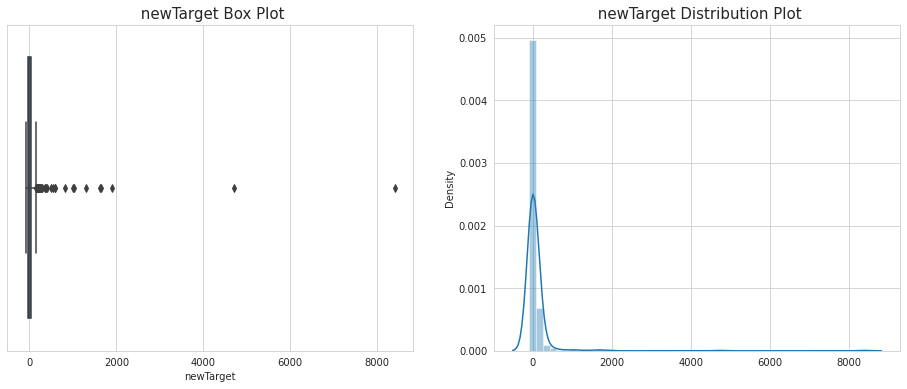

In [19]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="newTarget",data=df_C)
plt.title(' newTarget Box Plot', fontsize=15)


plt.subplot(1, 2, 2)
sns.distplot(x=df_C["newTarget"])
plt.title(' newTarget Distribution Plot', fontsize=15)

In [20]:
!pip install feature-engine
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualFrequencyDiscretiser

     |████████████████████████████████| 205 kB 5.1 MB/s 
     |████████████████████████████████| 9.8 MB 23.6 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [21]:
df_C.isna().sum()

playerId                      0
firstName                     0
lastName                      0
positionText                  0
teamName                      0
teamRank                      0
height                        0
weight                        0
age                           0
newToTeam                     0
newToLeague                   0
foreign                       0
apps                          0
firstStart                    0
subOn                         0
minsPlayed                    0
goal                          0
assistTotal                   0
yellowCard                    0
redCard                       0
totalShots                    0
shotsPerGame                  0
goalShotRatio                 0
keyPassPerGame_x              0
totalPassesPerGame            0
passSuccess                   0
dribbleWonPerGame             0
foulGivenPerGame              0
offsideGivenPerGame           0
dispossessedPerGame           0
turnoverPerGame               0
tacklePe

In [22]:
df_C.dropna(axis =0 , inplace = True)

In [23]:
discretizer = EqualFrequencyDiscretiser(q=2, variables = ['newTarget'])
discretizer.fit(df_C)

EqualFrequencyDiscretiser(q=2, variables=['newTarget'])

In [24]:
df_new_c  = discretizer.transform(df_C)
df_new_c['newTarget'].describe()

count    461.000000
mean       0.459870
std        0.498928
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: newTarget, dtype: float64

Text(0.5, 1.0, ' newTarget Distribution Plot')

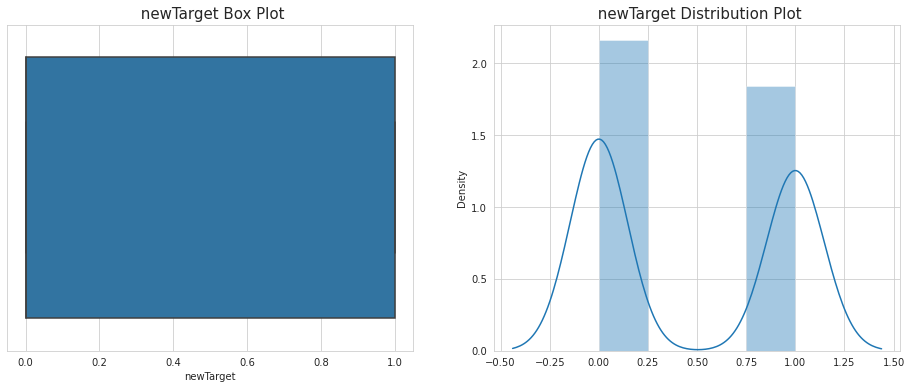

In [25]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="newTarget",data=df_new_c)
plt.title(' newTarget Box Plot', fontsize=15)


plt.subplot(1, 2, 2)
sns.distplot(x=df_new_c["newTarget"])
plt.title(' newTarget Distribution Plot', fontsize=15)

In [26]:
discretizer.binner_dict_

{'newTarget': [-inf, 0.0, inf]}

Text(0, 0.5, 'Number of Players')

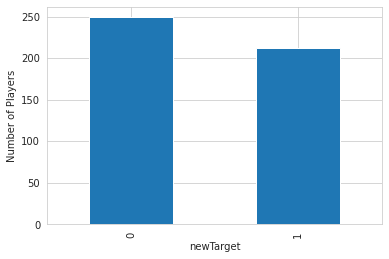

In [27]:
# with equal frequency discretisation, each bin contains approximately
# the same number of observations.
df_new_c.groupby('newTarget')['newTarget'].count().plot.bar()
plt.ylabel('Number of Players')

In [28]:
df_new_c['newTarget'].value_counts()

0    249
1    212
Name: newTarget, dtype: int64

In [29]:
df_new_c['ValuationRatio'] = df_new_c['newTarget']

In [30]:
df_new_c ['ValuationRatio'].value_counts()

0    249
1    212
Name: ValuationRatio, dtype: int64

Text(0.5, 1.0, ' ValuationRatio Distribution Plot')

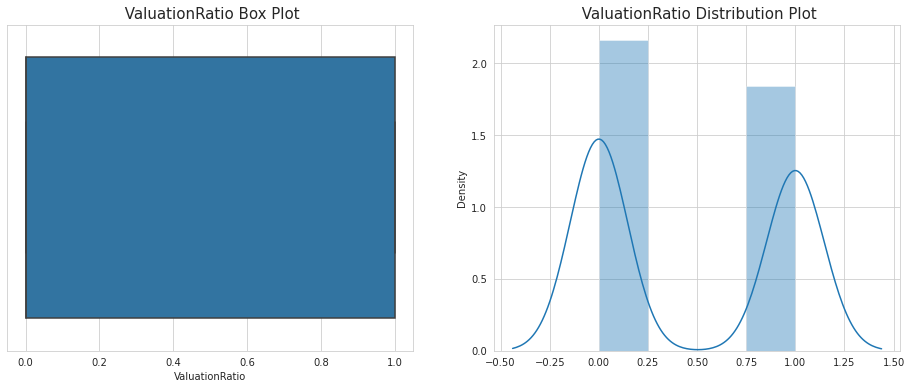

In [31]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="ValuationRatio",data=df_new_c)
plt.title(' ValuationRatio Box Plot', fontsize=15)


plt.subplot(1, 2, 2)
sns.distplot(x=df_new_c["ValuationRatio"])
plt.title(' ValuationRatio Distribution Plot', fontsize=15)

**Cluster C**

In [32]:

df_new = df_new_c.loc[df_new_c.kumeNoKmeans == 0]  

In [33]:
df_new.head()

,playerId,firstName,lastName,positionText,teamName,teamRank,height,weight,age,newToTeam,newToLeague,foreign,apps,firstStart,subOn,minsPlayed,goal,assistTotal,yellowCard,redCard,totalShots,shotsPerGame,goalShotRatio,keyPassPerGame_x,totalPassesPerGame,passSuccess,dribbleWonPerGame,foulGivenPerGame,offsideGivenPerGame,dispossessedPerGame,turnoverPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,clearancePerGame,wasDribbledPerGame,outfielderBlockPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,aerialWonPerGame,preValue,currentValue,position,kumeNoKmeans,newTarget,ValuationRatio
19,39356,Aatif,Chahechouhe,Midfielder,Erzurum BB,18,176,77,35,1,0,1,15,15,0,1298,4,1,3,0,39.0,2.600000,0.102564,0.800000,36.666667,85.454545,3.933333,1.466667,0.00,1.60,4.000000,2.000000,0.466667,1.533333,0.000000,0.200000,0.933333,0.000000,0.200000,1.066667,0.066667,0.333333,325000,400000,2,0,1,1
25,73291,Silviu,Lung Jr.,Goalkeeper,Kayserispor,17,189,84,32,0,0,1,8,8,0,676,0,0,1,0,0.0,0.000000,0.000000,0.000000,25.000000,67.000000,0.000000,0.000000,0.00,0.00,0.125000,0.125000,0.125000,0.000000,0.000000,0.375000,0.000000,0.000000,0.000000,4.750000,0.000000,0.125000,1000000,700000,0,0,0,0
37,381611,Berat,Özdemir,Midfielder,Trabzonspor,4,187,0,23,1,0,0,13,12,1,1043,3,0,1,0,6.0,0.466667,0.500000,0.733333,42.000000,85.531136,0.666667,1.333333,0.00,0.60,0.600000,2.076923,1.923077,0.923077,0.076923,1.923077,1.769231,0.076923,0.230769,4.461538,0.000000,0.769231,2000000,3500000,2,0,1,1
51,103658,Aykut,Özer,Goalkeeper,Fatih Karagumruk,8,188,80,28,0,0,0,9,8,1,781,0,0,0,0,0.0,0.000000,0.000000,0.000000,29.111111,60.687023,0.000000,0.111111,0.00,0.00,0.222222,0.000000,0.000000,0.000000,0.000000,1.111111,0.000000,0.000000,0.000000,4.444444,0.000000,0.777778,350000,400000,0,0,1,1
62,112726,Sener,Özbayrakli,Defender,Galatasaray,2,171,71,31,0,0,0,12,8,4,755,0,2,1,0,1.0,0.083333,0.000000,1.083333,31.083333,86.327078,0.750000,0.916667,0.25,0.25,0.666667,2.250000,0.750000,1.000000,0.250000,0.666667,0.916667,0.166667,0.750000,1.666667,0.000000,0.750000,225000,200000,1,0,0,0


**Feature Scaling**

In [34]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["apps"]]
df_new["apps"] = scaler.fit_transform(dataset_numerical)

In [35]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["firstStart"]]
df_new["firstStart"] = scaler.fit_transform(dataset_numerical)

In [36]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["minsPlayed"]]
df_new["minsPlayed"] = scaler.fit_transform(dataset_numerical)

In [37]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["goal"]]
df_new["goal"] = scaler.fit_transform(dataset_numerical)

In [38]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["foulGivenPerGame"]]
df_new["foulGivenPerGame"] = scaler.fit_transform(dataset_numerical)

In [39]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["tacklePerGame"]]
df_new["tacklePerGame"] = scaler.fit_transform(dataset_numerical)

In [40]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["interceptionPerGame"]]
df_new["interceptionPerGame"] = scaler.fit_transform(dataset_numerical)

In [41]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["foulsPerGame"]]
df_new["foulsPerGame"] = scaler.fit_transform(dataset_numerical)

In [42]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["offsideWonPerGame"]]
df_new["offsideWonPerGame"] = scaler.fit_transform(dataset_numerical)

In [43]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["wasDribbledPerGame"]]
df_new["wasDribbledPerGame"] = scaler.fit_transform(dataset_numerical)

In [44]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["outfielderBlockPerGame"]]
df_new["outfielderBlockPerGame"] = scaler.fit_transform(dataset_numerical)

In [45]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["aerialWonPerGame"]]
df_new["aerialWonPerGame"] = scaler.fit_transform(dataset_numerical)

In [46]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["keyPassPerGame_x"]]
df_new["keyPassPerGame_x"] = scaler.fit_transform(dataset_numerical)

In [47]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["dribbleWonPerGame"]]
df_new["dribbleWonPerGame"] = scaler.fit_transform(dataset_numerical)

In [48]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["assistTotal"]]
df_new["assistTotal"] = scaler.fit_transform(dataset_numerical)

In [49]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["totalPassesPerGame"]]
df_new["totalPassesPerGame"] = scaler.fit_transform(dataset_numerical)

In [50]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["accurateCrossesPerGame"]]
df_new["accurateCrossesPerGame"] = scaler.fit_transform(dataset_numerical)

In [51]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["accurateLongPassPerGame"]]
df_new["accurateLongPassPerGame"] = scaler.fit_transform(dataset_numerical)

In [52]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["accurateThroughBallPerGame"]]
df_new["accurateThroughBallPerGame"] = scaler.fit_transform(dataset_numerical)

In [53]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["clearancePerGame"]]
df_new["clearancePerGame"] = scaler.fit_transform(dataset_numerical)

In [54]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["offsideGivenPerGame"]]
df_new["offsideGivenPerGame"] = scaler.fit_transform(dataset_numerical)

In [55]:
scaler= StandardScaler()
dataset_numerical = df_new.loc[:,["passSuccess"]]
df_new["passSuccess"] = scaler.fit_transform(dataset_numerical)

## **Sınıflandırma modellerinde kullanılacak featureların seçimi**

In [56]:
df_new.columns

Index(['playerId', 'firstName', 'lastName', 'positionText', 'teamName',
       'teamRank', 'height', 'weight', 'age', 'newToTeam', 'newToLeague',
       'foreign', 'apps', 'firstStart', 'subOn', 'minsPlayed', 'goal',
       'assistTotal', 'yellowCard', 'redCard', 'totalShots', 'shotsPerGame',
       'goalShotRatio', 'keyPassPerGame_x', 'totalPassesPerGame',
       'passSuccess', 'dribbleWonPerGame', 'foulGivenPerGame',
       'offsideGivenPerGame', 'dispossessedPerGame', 'turnoverPerGame',
       'tacklePerGame', 'interceptionPerGame', 'foulsPerGame',
       'offsideWonPerGame', 'clearancePerGame', 'wasDribbledPerGame',
       'outfielderBlockPerGame', 'accurateCrossesPerGame',
       'accurateLongPassPerGame', 'accurateThroughBallPerGame',
       'aerialWonPerGame', 'preValue', 'currentValue', 'position',
       'kumeNoKmeans', 'newTarget', 'ValuationRatio'],
      dtype='object')

In [57]:
X = df_new [['newToTeam','newToLeague',
'foreign', 'apps', 'firstStart', 'minsPlayed', 'goal',
       "foulGivenPerGame","tacklePerGame","interceptionPerGame","foulsPerGame",
        "offsideWonPerGame","wasDribbledPerGame","outfielderBlockPerGame",
        "aerialWonPerGame","keyPassPerGame_x","dribbleWonPerGame","assistTotal","totalPassesPerGame","accurateCrossesPerGame","accurateLongPassPerGame",
        "accurateThroughBallPerGame","clearancePerGame" ,"offsideGivenPerGame",
       "passSuccess"]]
y = df_new["ValuationRatio"]

In [58]:
X.head() # Modele dahil edeceğimiz Kategorik değişkenlerimiz binary olduğu için bir encode işlemine gerek yok.

,newToTeam,newToLeague,foreign,apps,firstStart,minsPlayed,goal,foulGivenPerGame,tacklePerGame,interceptionPerGame,foulsPerGame,offsideWonPerGame,wasDribbledPerGame,outfielderBlockPerGame,aerialWonPerGame,keyPassPerGame_x,dribbleWonPerGame,assistTotal,totalPassesPerGame,accurateCrossesPerGame,accurateLongPassPerGame,accurateThroughBallPerGame,clearancePerGame,offsideGivenPerGame,passSuccess
19,1,0,1,-0.221255,1.819422,1.900471,1.534449,2.278255,2.347630,-0.263819,1.754487,-0.486226,1.425316,-0.652805,-0.540405,1.063929,7.242716,0.356399,1.179412,-0.003904,-0.211076,1.987778,-0.593947,-0.665235,0.819599
25,0,0,1,-1.859966,-0.130808,-0.464898,-0.697477,-1.635195,-1.245201,-0.930705,-1.690974,-0.486226,-1.490348,-0.652805,-0.794948,-1.346080,-1.006626,-0.651349,0.224092,-0.698486,2.358280,-0.390824,-0.419628,-0.665235,-1.461880
37,1,0,0,-0.689458,0.983609,0.930746,0.976467,1.922487,2.495028,2.578891,0.383217,-0.092037,4.036597,-0.277564,-0.007825,0.863095,0.391567,-0.651349,1.616129,0.102955,2.157059,-0.390824,1.122427,-0.665235,0.829067
51,0,0,0,-1.625864,-0.130808,-0.065599,-0.697477,-1.338722,-1.484723,-1.174687,-1.690974,-0.486226,-1.490348,-0.652805,0.002618,-1.346080,-1.006626,-0.651349,0.560728,-0.698486,2.145135,-0.390824,0.313619,-0.665235,-2.242334
62,0,0,0,-0.923559,-0.130808,-0.164473,-0.697477,0.810711,2.826674,0.289208,0.556066,0.794888,1.373251,0.160218,-0.031321,1.917474,0.566341,1.364147,0.722223,1.906197,0.207461,-0.390824,-0.129096,0.726759,0.927467


In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,random_state = 42)

In [60]:
df_new.ValuationRatio.value_counts()

0    104
1     60
Name: ValuationRatio, dtype: int64

In [61]:
print(f"Train set       --> feature size: {len(X_train)}, target size: {len(y_train)}")
print(f"Test set        --> feature size: {len(X_test)}, target size: {len(y_test)}")

Train set       --> feature size: 114, target size: 114
Test set        --> feature size: 50, target size: 50


# **Modelleme**

**Default Classifier**

In [62]:
from sklearn.dummy import DummyClassifier

clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train, y_train)

dummy_pred = clf.predict(X_test)
clf.score(X_test, y_test)


0.64

In [63]:
print(classification_report(dummy_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.64      0.78        50
           1       0.00      0.00      0.00         0

    accuracy                           0.64        50
   macro avg       0.50      0.32      0.39        50
weighted avg       1.00      0.64      0.78        50



**XGBoost**

In [64]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier().fit(X_train, y_train)

In [65]:
y_predXGB = xgb_model.predict(X_test)
accuracy_score(y_test, y_predXGB)

0.52

Text(33.0, 0.5, 'TRUE')

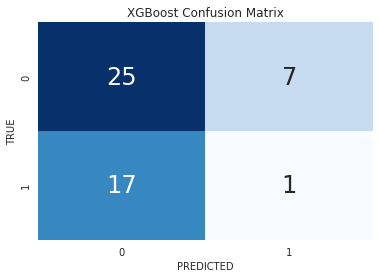

In [66]:
mtks = confusion_matrix(y_test, y_predXGB)
plt.title("XGBoost Confusion Matrix")
sns.heatmap(mtks,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [67]:
print(classification_report(y_test, y_predXGB))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68        32
           1       0.12      0.06      0.08        18

    accuracy                           0.52        50
   macro avg       0.36      0.42      0.38        50
weighted avg       0.43      0.52      0.46        50



**XGBoost modeline göre sınıflandırmada featureların etkilerini gösteren plot**

Text(0.5, 0, 'XGBoost Model Değişken Önem Düzeyleri')

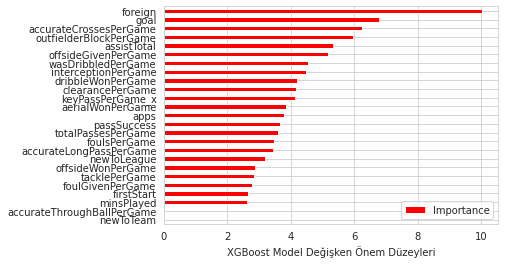

In [68]:
ImportanceXGB = pd.DataFrame({"Importance": xgb_model.feature_importances_*100},
                         index = X_train.columns)
ImportanceXGB.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "red")

plt.xlabel("XGBoost Model Değişken Önem Düzeyleri")

**RandomForrest**

In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier().fit(X_train, y_train)
y_predRF = rf_model.predict(X_test)
accuracy_score(y_test, y_predRF)

0.62

In [70]:
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Text(33.0, 0.5, 'TRUE')

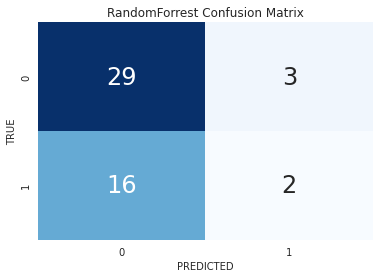

In [71]:
mtks2 = confusion_matrix(y_test, y_predRF)
plt.title("RandomForrest Confusion Matrix")
sns.heatmap(mtks2,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

Text(0.5, 0, 'Random Forrest Model Değişken Önem Düzeyleri')

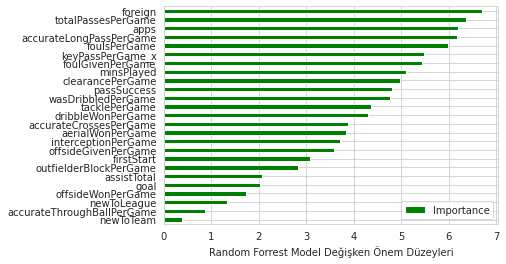

In [72]:
ImportanceRF = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                         index = X_train.columns)
ImportanceRF.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "g")

plt.xlabel("Random Forrest Model Değişken Önem Düzeyleri")

In [73]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       0.64      0.91      0.75        32
           1       0.40      0.11      0.17        18

    accuracy                           0.62        50
   macro avg       0.52      0.51      0.46        50
weighted avg       0.56      0.62      0.54        50



**KNN**

In [74]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
y_predKNN = knn_model.predict(X_test)
accuracy_score(y_test, y_predKNN)

0.6

In [75]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Text(33.0, 0.5, 'TRUE')

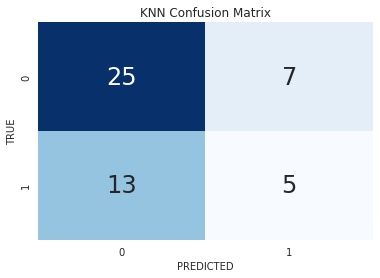

In [76]:
mtks3 = confusion_matrix(y_test, y_predKNN)
plt.title("KNN Confusion Matrix")
sns.heatmap(mtks3,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [77]:
print(classification_report(y_test, y_predKNN))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71        32
           1       0.42      0.28      0.33        18

    accuracy                           0.60        50
   macro avg       0.54      0.53      0.52        50
weighted avg       0.57      0.60      0.58        50



**Decision Tree -- CART**

In [78]:
from sklearn.tree import DecisionTreeClassifier #CART
DT = DecisionTreeClassifier()
DT_model = DT.fit(X_train, y_train)
y_predDT = DT_model.predict(X_test)
accuracy_score(y_test, y_predDT)

0.58

In [79]:
DT_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

Text(33.0, 0.5, 'TRUE')

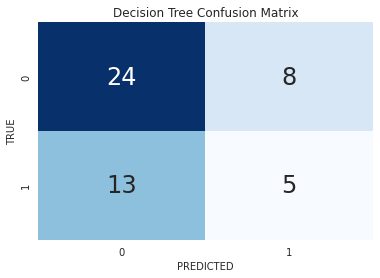

In [80]:
mtks4 = confusion_matrix(y_test, y_predDT)
plt.title("Decision Tree Confusion Matrix")
sns.heatmap(mtks4,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [81]:
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.65      0.75      0.70        32
           1       0.38      0.28      0.32        18

    accuracy                           0.58        50
   macro avg       0.52      0.51      0.51        50
weighted avg       0.55      0.58      0.56        50



Text(0.5, 0, 'Decision Tree Model Değişken Önem Düzeyleri')

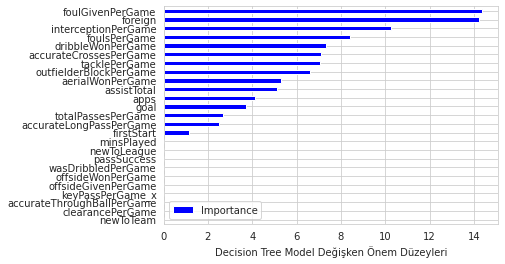

In [82]:
ImportanceDT = pd.DataFrame({"Importance": DT_model.feature_importances_*100},
                         index = X_train.columns)
ImportanceDT.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "b")

plt.xlabel("Decision Tree Model Değişken Önem Düzeyleri")

**Gradient Boosting Machines**

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)
y_predGBM = gbm_model.predict(X_test)
accuracy_score(y_test, y_predGBM)

0.54

In [84]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

Text(33.0, 0.5, 'TRUE')

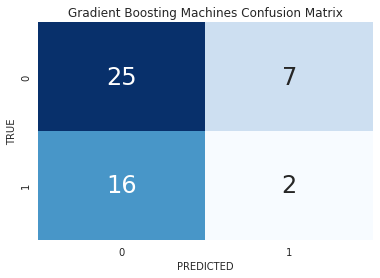

In [85]:
mtks5 = confusion_matrix(y_test, y_predGBM)
plt.title("Gradient Boosting Machines Confusion Matrix")
sns.heatmap(mtks5,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [86]:
print(classification_report(y_test, y_predGBM))

              precision    recall  f1-score   support

           0       0.61      0.78      0.68        32
           1       0.22      0.11      0.15        18

    accuracy                           0.54        50
   macro avg       0.42      0.45      0.42        50
weighted avg       0.47      0.54      0.49        50



Text(0.5, 0, 'GBM Model Değişken Önem Düzeyleri')

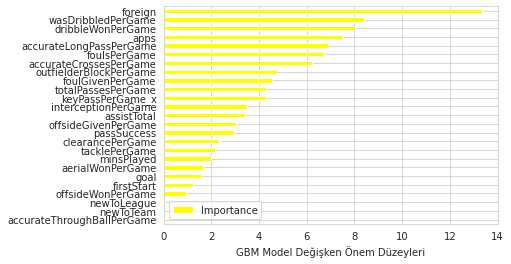

In [87]:
ImportanceGBM = pd.DataFrame({"Importance": gbm_model.feature_importances_*100},
                         index = X_train.columns)
ImportanceGBM.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "yellow")

plt.xlabel("GBM Model Değişken Önem Düzeyleri")

**Logistic Regression**

In [88]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression()
loj_model = loj.fit(X_train, y_train)
y_predLOJ = loj_model.predict(X_test)
accuracy_score(y_test, y_predLOJ)

0.7

In [89]:
loj_model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

Text(33.0, 0.5, 'TRUE')

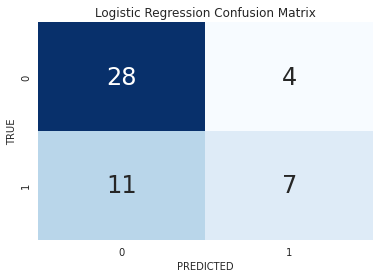

In [90]:
mtks6 = confusion_matrix(y_test, y_predLOJ)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(mtks6,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [91]:
print(classification_report(y_test, y_predLOJ))

              precision    recall  f1-score   support

           0       0.72      0.88      0.79        32
           1       0.64      0.39      0.48        18

    accuracy                           0.70        50
   macro avg       0.68      0.63      0.64        50
weighted avg       0.69      0.70      0.68        50



**SVM**

In [92]:
from sklearn.svm import SVC
svm_model = SVC(kernel = "linear").fit(X_train, y_train)
y_predSVM = svm_model.predict(X_test)
accuracy_score(y_test, y_predSVM)

0.76

In [93]:
svm_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Text(33.0, 0.5, 'TRUE')

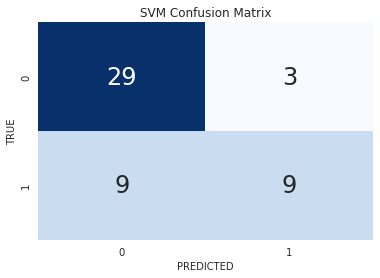

In [94]:
mtks7 = confusion_matrix(y_test, y_predSVM)
plt.title("SVM Confusion Matrix")
sns.heatmap(mtks7,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
plt.xlabel('PREDICTED')
plt.ylabel('TRUE')

In [95]:
print(classification_report(y_test, y_predSVM))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.75      0.50      0.60        18

    accuracy                           0.76        50
   macro avg       0.76      0.70      0.71        50
weighted avg       0.76      0.76      0.75        50



# **Modellerin Kıyaslanması**

In [96]:
accuracies = {}
accuracies['LogisticReg.'] = round(accuracy_score(y_test, y_predLOJ),2)
accuracies['GradientBoostingMachine'] = round(accuracy_score(y_test, y_predGBM),2)
accuracies['DecisionTree'] = round(accuracy_score(y_test, y_predDT),2)
accuracies['RandomForrest'] = round(accuracy_score(y_test, y_predRF),2)
accuracies['KNN'] = round(accuracy_score(y_test, y_predKNN),2)
accuracies['XGBoost'] = round(accuracy_score(y_test, y_predXGB),2)
accuracies['SVM'] = round(accuracy_score(y_test, y_predSVM),2)

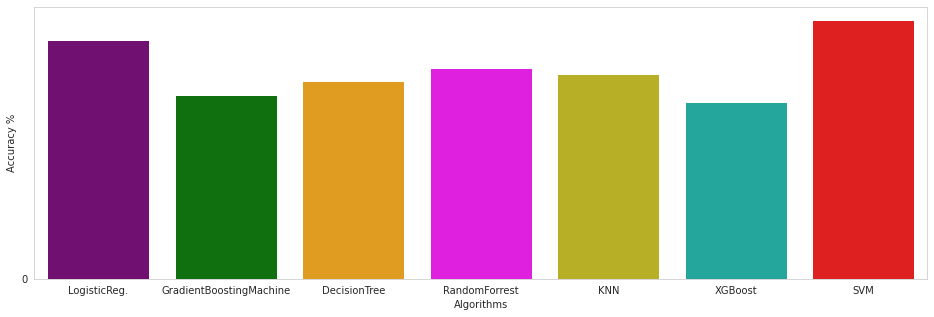

In [97]:
colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE",'red']

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()

In [98]:
indexr=['Accuracy']
df_acc = pd.DataFrame(accuracies,index=indexr)
df_acc


,LogisticReg.,GradientBoostingMachine,DecisionTree,RandomForrest,KNN,XGBoost,SVM
Accuracy,0.7,0.54,0.58,0.62,0.6,0.52,0.76
